In [1]:
import numpy as np
from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

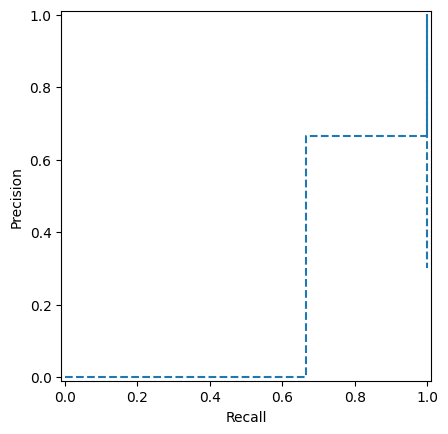

In [3]:
workbench.displayPRCurveFromId(path_to_mmpdf_db, id=127, verbose=True)

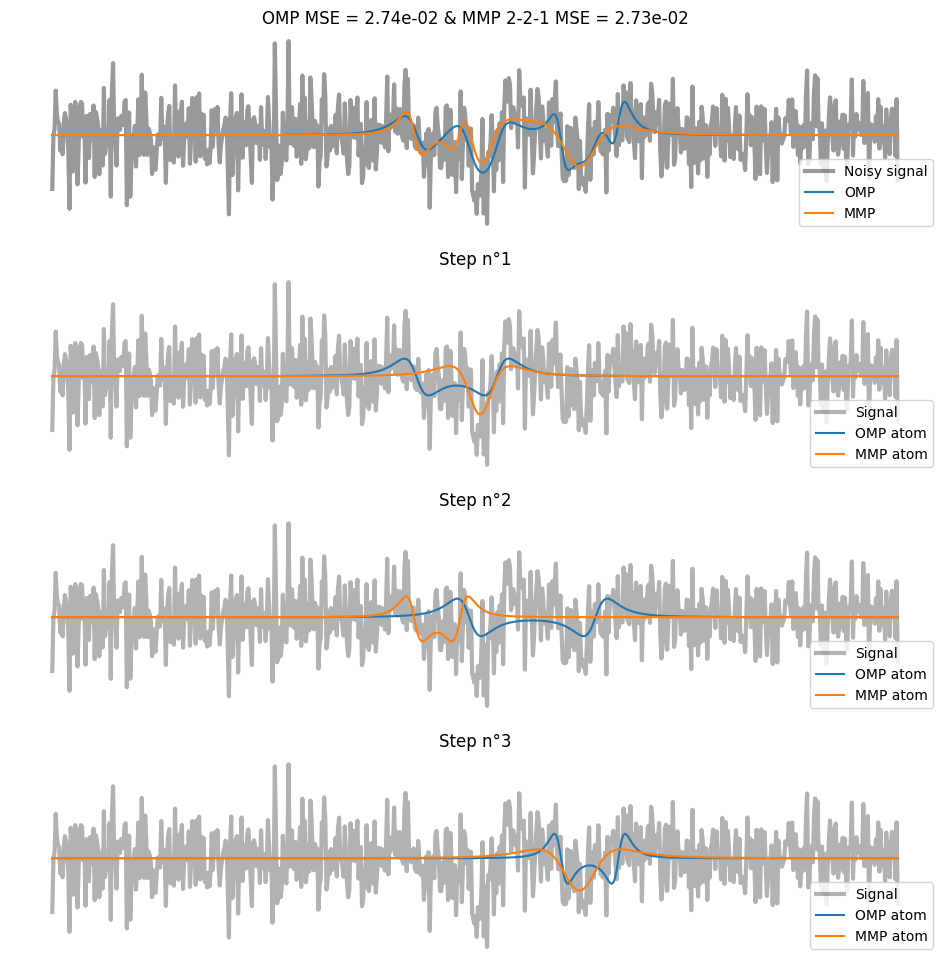

In [4]:
workbench.plotMMPDecomposition(path_to_mmpdf_db, id=127)

In [5]:
all_pr = workbench.computePRCurvesFromSparsity(path_to_mmpdf_db, sparsity=4)

In [ ]:
fig, ax = plt.subplots()
pr_mean, pr_mean_plus_std, pr_mean_minus_std = workbench.computeMeanPRCurve(all_pr, n_samples=1000)

CSCWorkbench.plotPRCurve(pr_mean, ax=ax, color="k", alpha=1)
CSCWorkbench.plotPRCurve(pr_mean_plus_std, ax=ax, color="r", alpha=0.5)
CSCWorkbench.plotPRCurve(pr_mean_minus_std, ax=ax, color="r", alpha=0.5)